# procedure - E SLM to polarimetric image

Conocida una curva de calibración LUT, se carga dicha LUT y se obtiene la matriz de Jones polarimétrica m(x,y) de una máscara determinada.


## Load

In [21]:
%load_ext autoreload
%autoreload 2

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']= [5.0, 5.0]
matplotlib.rcParams['image.cmap']= 'seismic'
matplotlib.rcParams['image.interpolation']= 'bilinear'
matplotlib.rcParams['image.origin']= 'lower'

In [1]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

In [2]:
from slm import np, sp, plt, um, mm, degrees

from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl, get_LUT_amplitude, get_LUT_phases
from slm.LCD_models import LCD_kopin, LCD_sony

number of processors: 8


In [3]:
best_amplitude_angles_kopin=np.load('best_amplitude_angles_kopin.npz')
best_amplitude_angles_kopin=best_amplitude_angles_kopin['angles']
print(best_amplitude_angles_kopin/degrees)

best_phase_angles_kopin=np.load('best_phase_angles_kopin.npz')
best_phase_angles_kopin=best_phase_angles_kopin['angles']
print(best_phase_angles_kopin/degrees)

[127.02439883  57.92425749 147.96711836  37.25893434]
[ 52.04937572  67.03487887 109.02981302  28.22204403]


## Parameters

In [4]:
LCD_model=LCD_kopin #LCD_kopin, LCD_sony
best_amplitude_angles=best_amplitude_angles_kopin
best_phase_angles=best_phase_angles_kopin

num_gl=LCD_model['gl'].shape[0]
gl=LCD_model['gl']

In [5]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

source = Jones_vector()
source.from_matrix(v0);
source.M

array([[ 0.70710678+0.j        ],
       [-0.        -0.70710678j]])

In [6]:
LCD_experiment = LCD_jones_matrices(LCD_model)
LCD_jones = LCD_experiment.DC_to_pypol()

In [7]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(p1=1, p2=0, azimuth=0* degrees, length=num_gl, shape_like=LCD_jones)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(p1=1, p2=0, azimuth=0, length=num_gl, shape_like=LCD_jones)

polarizers=(pol1, pol2, pol3, pol4)

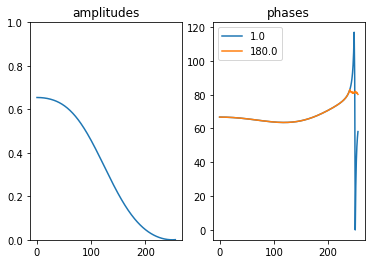

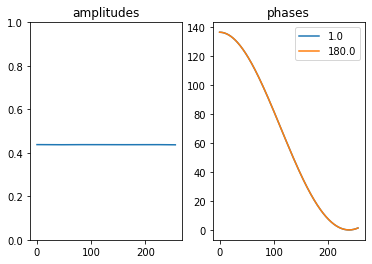

In [8]:
SLM_Jones_amplitude, amplitudes, phases_dummy = get_fields_gl(
    polarizers,
    LCD_jones,
    source,
    angles=best_amplitude_angles,
    gl=gl,
    has_draw=True)

SLM_Jones_phase, amplitudes_dummy, phases = get_fields_gl(
    polarizers,
    LCD_jones,
    source,
    angles=best_phase_angles,
    gl=gl,
    has_draw=True)

## Convert amplitudes

In [9]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw2D

number of processors: 8


In [10]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f27bed940b8>)

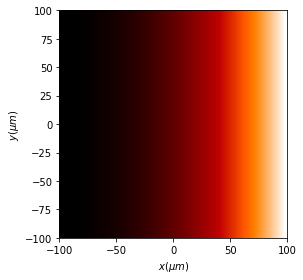

In [11]:
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.gray_scale(255,0,1)
t_mask.draw()

In [12]:
LUT_amplitudes=get_LUT_amplitude(amplitudes, gl,t_mask.u)

In [13]:
SLM_jones=LCD_jones[LUT_amplitudes]

The retardance of SLM_picked is (deg.):
The mean value is 92.26413277333245 +- 42.70624812835607


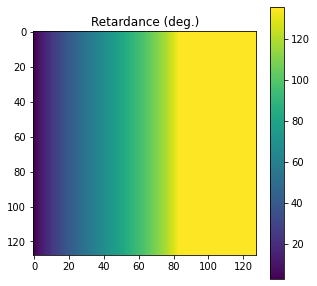

In [14]:
SLM_jones.parameters.retardance(draw=True);

## Convert phases

In [15]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

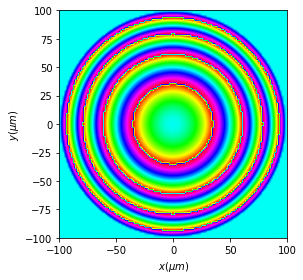

In [16]:
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.lens(r0=(0,0), radius=(100,100), focal=(2*mm,2*mm))
t_mask.draw('phase');

In [17]:
LUT_phases=get_LUT_phases(phases, gl,np.angle(t_mask.u),has_draw=False)

In [18]:
SLM_jones=LCD_jones[LUT_phases]

The retardance of SLM_picked is (deg.):
The mean value is 36.76278979346282 +- 50.49753280668421


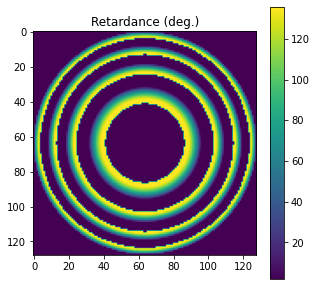

In [19]:
SLM_jones.parameters.retardance(draw=True);

In [20]:
SLM_jones[0,0]

SLM_picked_picked = 
[+0.953-0.302j +0.014+0.012j ]   
[-0.005+0.018j +0.954-0.298j ]   